In [2]:
import pickle
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from langdetect import detect,detect_langs
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer

matplotlib.style.use("ggplot")
matplotlib.rcParams.update({'font.size': 13})


In [3]:
category = {}
category_sub = {}
description = {}

for nm in ["alphabay", "poseidon", "silkroad"]:
    description[nm], category[nm], category_sub[nm] = pickle.load(open("data/meta/{}_dataset.p".format(nm), "rb"))
    
    print(nm, ":", len(description[nm]), "samples, \n", len(set(category[nm])),"mains, ", len(set(category_sub[nm])), "subs")

alphabay : 15222 samples, 
 12 mains,  48 subs
poseidon : 3688 samples, 
 10 mains,  36 subs
silkroad : 2137 samples, 
 1 mains,  22 subs


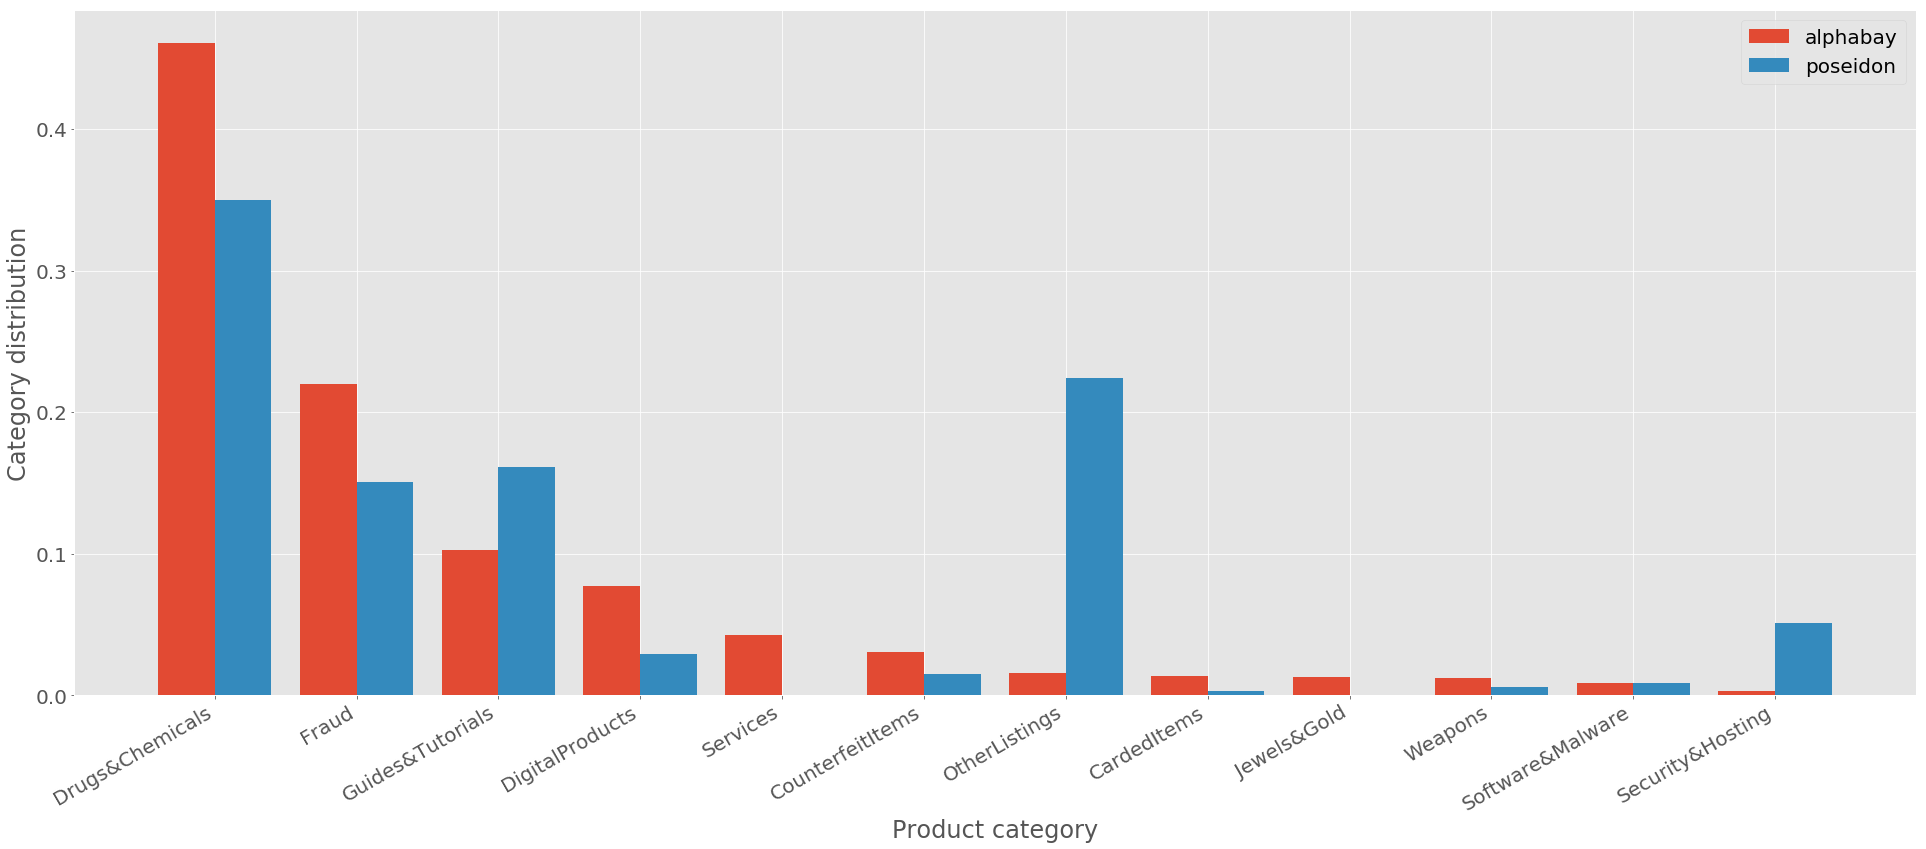

In [3]:
matplotlib.rcParams.update({'font.size': 20})

def get_category(inp, norm=False):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(33, 14)

    d_key = None
    for i, nm in enumerate(inp):
        tot = 0
        data_={}

        for cat in category[nm]:            
            try:
                data_[cat] += 1
            except:
                data_[cat] = 1
            tot+=1

        if d_key==None:
            d_key = [k for k in sorted(data_, key=lambda k: data_[k], reverse=True)] #if k!="OtherListings"
#         d_val = [data_.get(k)/tot for k in d_key]

        d_val = []
        for k in d_key:
            if k in data_.keys():
                if norm:
                    d_val.append(data_.get(k)/tot)
                else:
                    d_val.append(data_.get(k))
            else:
                d_val.append(0)
    
        plt.bar(np.arange(len(d_key))+(0.8/len(inp)*i)-.2, d_val, 0.8/len(inp), align='center', label=nm)
        
    plt.ylabel("Category distribution")
    plt.xlabel("Product category")
    plt.legend()
    plt.xticks(range(len(d_key)), d_key)
    fig.autofmt_xdate()
    plt.show()

get_category(["alphabay", "poseidon"], norm=True)
# get_category(["alphabay"], norm=True)
# get_category(["poseidon"], norm=True)
# get_category(["silkroad"], norm=True)


In [4]:
#
# Remove numbers from a sample
#
def remove_numbers(str):
    result = ''.join(i for i in str if not i.isdigit())
    return(result)

description_nodigit = {}

for x in description.keys():
    tmp = description[x]
    for y in tqdm(range(len(tmp))):
        description[x][y] = remove_numbers(description[x][y])

100%|██████████| 3688/3688 [00:00<00:00, 8217.21it/s]


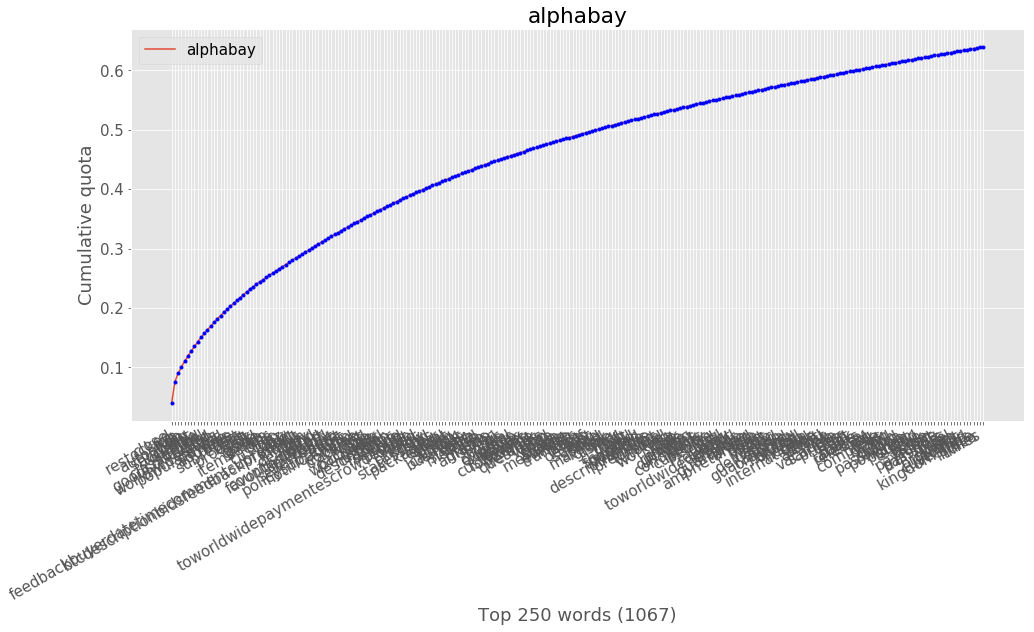

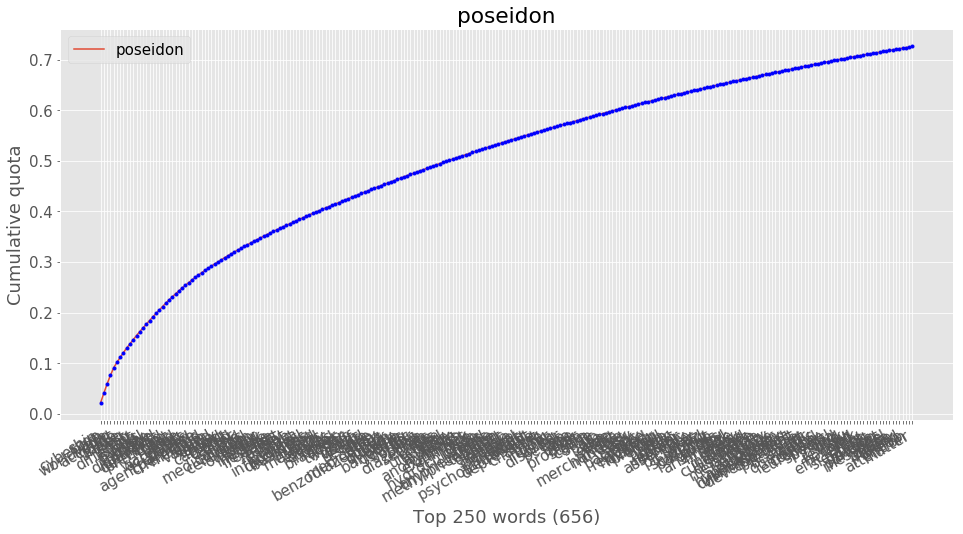

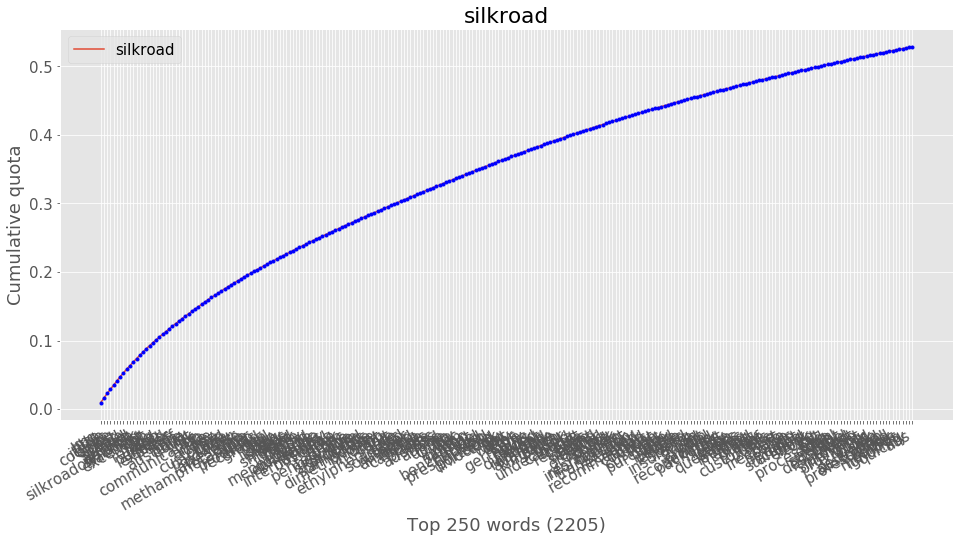

In [5]:
matplotlib.rcParams.update({'font.size': 15})

def get_word_dist(inp, disp_nr=15):
    for nm in inp:
        inp = description[nm]

        # # Count words using the CountVectorizer, and sum rows
        cv = CountVectorizer(stop_words='english', max_df=.5, min_df=.01)
        res = cv.fit_transform(inp)
        word_m = res.sum(0)
        tot_w = res.sum()

        # Map words-occurance using CV's vocabulary_
        occurance = {}
        for x in cv.vocabulary_.items():
            occurance[x[0]] = word_m.item(x[1])

        # Sort dict to list
        d_key = [k for k in sorted(occurance, key=lambda k: occurance[k], reverse=True)]
        d_val = [occurance.get(k) for k in d_key]

        # Get cummulative sum
        norm = [float(i)/tot_w for i in d_val]
        norm = np.matrix(norm)
        cumsum =  norm.cumsum().tolist()[0]

        # Plot
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(16, 8)
        plt.title(nm)
        plt.ylabel("Cumulative quota")
        plt.xlabel("Top {} words ({})".format(disp_nr, res.shape[1]))
        plt.plot(cumsum[:disp_nr], label=nm)
        plt.plot(cumsum[:disp_nr],'b.')
        plt.xticks(range(disp_nr), d_key[:disp_nr])
        fig.autofmt_xdate()
        plt.legend()
        plt.show()

get_word_dist(["alphabay", "poseidon", "silkroad"], 250)

In [7]:
len(category["alphabay"])

15222

2160.5  - Standard Deviation
469  - Samples Outside Standard Deviation


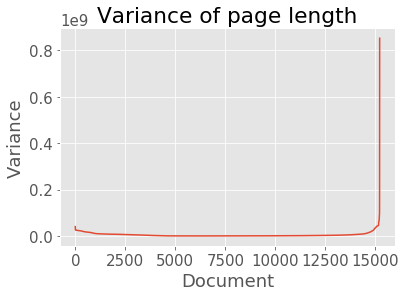

406.6  - Standard Deviation
304  - Samples Outside Standard Deviation


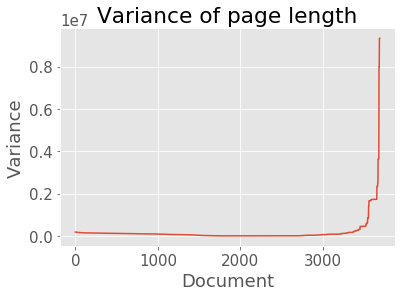

In [44]:
#
# Get dataset info
#

def page_length(nm):
    le = []
    for x in description[nm]:
        le.append(len(x))
    le = sorted(le)
#     le = [x/max(le) for x in le]
        
    mean = np.mean(np.array(le)) # mean val
    dev = [(x-mean)**2 for x in le] # deviation
    var = np.mean(np.array(dev)) # variance
    std_dev = math.sqrt(var) # standard deviation

    div_std = ([(mean-x) for x in sorted(le)])

    print(round(std_dev,1), " - Standard Deviation")
    print(len([x for x in dev if x<std_dev]), " - Samples Outside Standard Deviation")
    plt.title("Variance of page length")
    plt.xlabel("Document")
    plt.ylabel("Variance")
    plt.plot(dev)
    plt.show()

page_length("alphabay")
page_length("poseidon")

In [ ]:
def get_words(disp_nr=15, cat=None):
    # Get all description of type
     
    if not cat:
        inp = description["Silkroad"]
    else:
        inp = []
        for i,d in enumerate(data):
            if cat in d:
                inp.append(desc[i])
    
    # Count words using the CountVectorizer, and sum rows
    cv = CountVectorizer(stop_words='english',min_df=1, max_df=0.75)
    res = cv.fit_transform(inp)
    word_m = res.sum(0)

    # Map words-occurance using CV's vocabulary_
    occurance = {}
    for x in cv.vocabulary_.items():
        occurance[x[0]] = word_m.item(x[1])

    # Sort dict to list
    d_key = [k for k in sorted(occurance, key=lambda k: occurance[k], reverse=True)]
    d_val = [occurance.get(k) for k in d_key]

    # Plot
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(16, 8)
    plt.ylabel("Occurances")
    plt.xlabel("Word")
    plt.bar(range(disp_nr), d_val[:disp_nr], align='center', label=cat)
    plt.xticks(range(disp_nr), d_key[:disp_nr])
    plt.legend()
    fig.autofmt_xdate()
    plt.show()

get_words()
for x in list(set(data)):
    try:
        get_words(cat=x)
    except:
        print(x)

In [ ]:
def get_language():
    language={}
    for x in tqdm(dataset):
        try:
            cat = detect(x.get("description"))
            language[cat] += 1
        except:
            cat = detect(x.get("description"))
            language[cat] = 1
    print(language) # ~90% english

    d_key = [k for k in sorted(language, key=lambda k: language[k], reverse=True)]
    d_val = [language.get(k) for k in d_key]

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(5, 5)
    plt.bar(range(len(language)), d_val, align='center')
    plt.xticks(range(len(language)), d_key)
    fig.autofmt_xdate()
    plt.show()

get_language()